In [0]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
from math import log
import operator
import pickle

In [0]:
def createDataSet():
	dataSet = [[0, 0, 0, 0, 'no'],						#数据集
			[0, 0, 0, 1, 'no'],
			[0, 1, 0, 1, 'yes'],
			[0, 1, 1, 0, 'yes'],
			[0, 0, 0, 0, 'no'],
			[1, 0, 0, 0, 'no'],
			[1, 0, 0, 1, 'no'],
			[1, 1, 1, 1, 'yes'],
			[1, 0, 1, 2, 'yes'],
			[1, 0, 1, 2, 'yes'],
			[2, 0, 1, 2, 'yes'],
			[2, 0, 1, 1, 'yes'],
			[2, 1, 0, 1, 'yes'],
			[2, 1, 0, 2, 'yes'],
			[2, 0, 0, 0, 'no']]
	labels = ['年龄', '有工作', '有自己的房子', '信贷情况']		#特征标签
	return dataSet, labels 

In [0]:
def create_data():
    datasets = [['青年', '否', '否', '一般', '否'],
               ['青年', '否', '否', '好', '否'],
               ['青年', '是', '否', '好', '是'],
               ['青年', '是', '是', '一般', '是'],
               ['青年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '好', '否'],
               ['中年', '是', '是', '好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '好', '是'],
               ['老年', '是', '否', '好', '是'],
               ['老年', '是', '否', '非常好', '是'],
               ['老年', '否', '否', '一般', '否'],
               ]
    labels = [u'年龄', u'有工作', u'有自己的房子', u'信贷情况', u'类别']
    # 返回数据集和每个维度的名称
    return datasets, labels

In [0]:
dataSet, labels = createDataSet()

In [4]:
dataSet

[[0, 0, 0, 0, 'no'],
 [0, 0, 0, 1, 'no'],
 [0, 1, 0, 1, 'yes'],
 [0, 1, 1, 0, 'yes'],
 [0, 0, 0, 0, 'no'],
 [1, 0, 0, 0, 'no'],
 [1, 0, 0, 1, 'no'],
 [1, 1, 1, 1, 'yes'],
 [1, 0, 1, 2, 'yes'],
 [1, 0, 1, 2, 'yes'],
 [2, 0, 1, 2, 'yes'],
 [2, 0, 1, 1, 'yes'],
 [2, 1, 0, 1, 'yes'],
 [2, 1, 0, 2, 'yes'],
 [2, 0, 0, 0, 'no']]

In [0]:
from collections import Counter

In [0]:
label_count = Counter(data[-1] for data in dataSet)
# 统计标签出现的次数

In [8]:
label_count

Counter({'no': 6, 'yes': 9})

In [0]:
# 计算概率
probs = [p[1] / len(dataSet) for p in label_count.items()]

In [10]:
probs

[0.4, 0.6]

In [0]:
# 计算香农熵
shannonEnt = sum([-p * log(p, 2) for p in probs])

In [12]:
shannonEnt

0.9709505944546686

## 求解log0

In [14]:
log0 = 0*log(0,2)

ValueError: ignored

# 手写决策树

In [0]:
def calEnt(dataSet):
	# 统计标签出现的次数
	label_count = Counter(data[-1] for data in dataSet)
	# 计算概率
	probs = [p[1] / len(dataSet) for p in label_count.items()]
	# 计算香农熵
	shannonEnt = sum([-p * log(p, 2) for p in probs])
#     (-p*np.log2(p)).sum()

	return shannonEnt	

In [0]:
"""
函数说明:按照给定特征划分数据集

Parameters:
	dataSet - 待划分的数据集
	axis - 划分数据集的特征
	value - 需要返回的特征的值
Returns:
	无
"""
def splitDataSet(dataSet, axis, value):		
	retDataSet = []										#创建返回的数据集列表
	for featVec in dataSet: 							#遍历数据集
		if featVec[axis] == value:
			reducedFeatVec = featVec[:axis]				#去掉axis特征
			reducedFeatVec.extend(featVec[axis+1:]) 	#将符合条件的添加到返回的数据集
#             只选取[0:axis-1][axis+1:]的数据
            # list.append(object) 向列表中添加一个对象object
			retDataSet.append(reducedFeatVec)
	return retDataSet		  							#返回划分后的数据集

In [0]:
'''
result = []
result.extend([1,2,3])
print(result)
result.append([4,5,6])
print(result)
result.extend([7,8,9])
print(result)
结果：
[1, 2, 3]
[1, 2, 3, [4, 5, 6]]
[1, 2, 3, [4, 5, 6], 7, 8, 9]
'''

In [18]:
splitDataSet(dataSet,0,1)

[[0, 0, 0, 'no'],
 [0, 0, 1, 'no'],
 [1, 1, 1, 'yes'],
 [0, 1, 2, 'yes'],
 [0, 1, 2, 'yes']]

## 数据集2上划分数据

In [0]:
datasets, labels2 = create_data()

In [21]:
datasets

[['青年', '否', '否', '一般', '否'],
 ['青年', '否', '否', '好', '否'],
 ['青年', '是', '否', '好', '是'],
 ['青年', '是', '是', '一般', '是'],
 ['青年', '否', '否', '一般', '否'],
 ['中年', '否', '否', '一般', '否'],
 ['中年', '否', '否', '好', '否'],
 ['中年', '是', '是', '好', '是'],
 ['中年', '否', '是', '非常好', '是'],
 ['中年', '否', '是', '非常好', '是'],
 ['老年', '否', '是', '非常好', '是'],
 ['老年', '否', '是', '好', '是'],
 ['老年', '是', '否', '好', '是'],
 ['老年', '是', '否', '非常好', '是'],
 ['老年', '否', '否', '一般', '否']]

In [23]:
splitDataSet(datasets,0,'青年')

[['否', '否', '一般', '否'],
 ['否', '否', '好', '否'],
 ['是', '否', '好', '是'],
 ['是', '是', '一般', '是'],
 ['否', '否', '一般', '否']]

In [24]:
splitDataSet(datasets,1,'青年')  # ‘青年’属于第0列的特征,axis=1 没有青年这种特征，故为空集

[]

## 选择最大信息增益的特征

In [0]:
def chooseBestFeatureToSplit(dataSet):
	numFeatures = len(dataSet[0]) - 1					#特征数量
	baseEntropy = calEnt(dataSet) 				#计算数据集的香农熵
	bestInfoGain = 0.0  								#信息增益
	bestFeature = -1									#最优特征的索引值
	for i in range(numFeatures): 						#遍历所有特征
		#获取dataSet的第i列特征
		featList = [example[i] for example in dataSet]
        
		uniqueVals = set(featList)     					#创建set集合{},元素不可重复，一列特征有几种分类
        
		newEntropy = 0.0  								#经验条件熵
		for value in uniqueVals: 						#计算信息增益
			childSet = splitDataSet(dataSet, i, value) 		#childSet划分后的子集
			prob = len(childSet) / float(len(dataSet))   		#计算子集的概率
			newEntropy += prob * calEnt(childSet) 	#根据公式计算经验条件熵
		infoGain = baseEntropy - newEntropy 					#信息增益
		print("第%d个特征的增益为%.3f" % (i, infoGain))			#打印每个特征的信息增益
		if (infoGain > bestInfoGain): 							#计算信息增益
			bestInfoGain = infoGain 							#更新信息增益，找到最大的信息增益
			bestFeature = i 									#记录信息增益最大的特征的索引值
	return bestFeature 											#返回信息增益最大的特征的索引值


In [29]:
chooseBestFeatureToSplit(dataSet)

第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363


2

In [30]:
chooseBestFeatureToSplit(datasets)

第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363


2

In [0]:
"""
函数说明:统计classList中出现此处最多的元素(类标签)

Parameters:
	classList - 类标签列表
Returns:

"""
def majorityCnt(classList):
    major_label = Counter(classList).most_common(1)[0]
    return major_label


In [119]:
classList = [example[-1] for example in dataSet]
classList

['no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no']

In [121]:
Counter(classList)

Counter({'no': 6, 'yes': 9})

In [122]:
Counter(classList).most_common(1)

[('yes', 9)]

In [120]:
majorityCnt(classList)

('yes', 9)

In [0]:
def createTree(dataSet, labels):
    """
    Desc:
        创建决策树
    Args:
        dataSet -- 要创建决策树的训练数据集
        labels -- 训练数据集中特征对应的含义的labels，不是目标变量
    Returns:
        myTree -- 创建完成的决策树
    """
    classList = [example[-1] for example in dataSet]
    # 如果数据集的最后一列的第一个值出现的次数=整个集合的数量，也就说只有一个类别，就只直接返回结果就行
    # 第一个停止条件：所有的类标签完全相同，则直接返回该类标签。
    # count() 函数是统计括号中的值在list中出现的次数
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 如果数据集只有1列，那么最初出现label次数最多的一类，作为结果
    # 第二个停止条件：使用完了所有特征，仍然不能将数据集划分成仅包含唯一类别的分组。
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)

    # 选择最优的列，得到最优列对应的label含义
    bestFeat = chooseBestFeatureToSplit(dataSet)
    # 获取label的名称
    bestFeatLabel = labels[bestFeat]
    # 初始化myTree
    myTree = {bestFeatLabel: {}}
    # 注：labels列表是可变对象，在PYTHON函数中作为参数时传址引用，能够被全局修改
    # 所以这行代码导致函数外的同名变量被删除了元素，造成例句无法执行，提示'house' is not in list
    del(labels[bestFeat])
    # 取出最优列，然后它的branch做分类
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        # 求出剩余的标签label
        subLabels = labels[:]
        # 遍历当前选择特征包含的所有属性值，在每个数据集划分上递归调用函数createTree()
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
        # print('myTree', value, myTree)
    return myTree

In [0]:
labels = ['age', 'work', 'house', '信贷情况']

In [115]:
myTree = createTree(dataSet, labels[:])

第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
第0个特征的增益为0.252
第1个特征的增益为0.918
第2个特征的增益为0.474


In [103]:
myTree.keys()

dict_keys(['house'])

In [108]:
list(myTree.keys())[0]

'house'

In [0]:
def classify(inputTree, featLabels, testVec):
    """
    Desc:
        对新数据进行分类
    Args:
        inputTree  -- 已经训练好的决策树模型
        featLabels -- Feature标签对应的名称，不是目标变量
        testVec    -- 测试输入的数据
    Returns:
        classLabel -- 分类的结果值，需要映射label才能知道名称
    """
    # 获取tree的根节点对于的key值
    firstStr = list(inputTree.keys())[0]
    # 通过key得到根节点对应的value
    secondDict = inputTree[firstStr]
    # 判断根节点名称获取根节点在label中的先后顺序，这样就知道输入的testVec怎么开始对照树来做分类
    featIndex = featLabels.index(firstStr)
    # 测试数据，找到根节点对应的label位置，也就知道从输入的数据的第几位来开始分类
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    print('+++', firstStr, 'xxx', secondDict, '---', key, '>>>', valueOfFeat)
    # 判断分枝是否结束: 判断valueOfFeat是否是dict类型
    if isinstance(valueOfFeat, dict):
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else:
        classLabel = valueOfFeat
    return classLabel

In [0]:
def classify2(inputTree,labels, testVec):
    firstStr = next(iter(inputTree)) #获取决策树第一个节点
    secondDict = inputTree[firstStr] #下一个字典
    featIndex = labels.index(firstStr) #第一个节点所在列的索引
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]) == dict :
            # if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], labels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel

In [125]:
classify(myTree, labels, [1,1,0,1])

+++ house xxx {0: {'work': {0: 'no', 1: 'yes'}}, 1: 'yes'} --- 0 >>> {'work': {0: 'no', 1: 'yes'}}
+++ work xxx {0: 'no', 1: 'yes'} --- 1 >>> yes


'yes'

In [116]:
labels

['age', 'work', 'house', '信贷情况']

In [48]:
dataSet

[[0, 0, 0, 0, 'no'],
 [0, 0, 0, 1, 'no'],
 [0, 1, 0, 1, 'yes'],
 [0, 1, 1, 0, 'yes'],
 [0, 0, 0, 0, 'no'],
 [1, 0, 0, 0, 'no'],
 [1, 0, 0, 1, 'no'],
 [1, 1, 1, 1, 'yes'],
 [1, 0, 1, 2, 'yes'],
 [1, 0, 1, 2, 'yes'],
 [2, 0, 1, 2, 'yes'],
 [2, 0, 1, 1, 'yes'],
 [2, 1, 0, 1, 'yes'],
 [2, 1, 0, 2, 'yes'],
 [2, 0, 0, 0, 'no']]

# 绘制决策树

In [0]:
"""
函数说明:获取决策树叶子结点的数目

Parameters:
	myTree - 决策树
Returns:
	numLeafs - 决策树的叶子结点的数目
"""
def getNumLeafs(myTree):
    numLeafs = 0												#初始化叶子
    firstStr = next(iter(myTree))								#python3中myTree.keys()返回的是dict_keys,不在是list,所以不能使用myTree.keys()[0]的方法获取结点属性，可以使用list(myTree.keys())[0]
    secondDict = myTree[firstStr]								#获取下一组字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':				#测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

"""
函数说明:获取决策树的层数

Parameters:
	myTree - 决策树
Returns:
	maxDepth - 决策树的层数
"""
def getTreeDepth(myTree):
    maxDepth = 0												#初始化决策树深度
    firstStr = next(iter(myTree))								#python3中myTree.keys()返回的是dict_keys,不在是list,所以不能使用myTree.keys()[0]的方法获取结点属性，可以使用list(myTree.keys())[0]
    secondDict = myTree[firstStr]								#获取下一个字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':				#测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth			#更新层数
    return maxDepth


In [0]:

"""
函数说明:绘制结点

Parameters:
	nodeTxt - 结点名
	centerPt - 文本位置
	parentPt - 标注的箭头位置
	nodeType - 结点格式
Returns:
	无
"""
import os
from matplotlib.font_manager import FontProperties
 
myfont = FontProperties(fname=os.path.join('/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf')) # 这里请写上自己的ttf路径


def plotNode(nodeTxt, centerPt, parentPt, nodeType):
	arrow_args = dict(arrowstyle="<-")											#定义箭头格式
# 	font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)		#设置中文字体
	createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',	#绘制结点
		xytext=centerPt, textcoords='axes fraction',
		va="center", ha="center", bbox=nodeType, arrowprops=arrow_args
                            , FontProperties=myfont
                           )


In [0]:

"""
函数说明:标注有向边属性值

Parameters:
	cntrPt、parentPt - 用于计算标注位置
	txtString - 标注的内容
Returns:
	无
""" 
def plotMidText(cntrPt, parentPt, txtString):
	xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]											#计算标注位置					
	yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
	createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

"""
函数说明:绘制决策树

Parameters:
	myTree - 决策树(字典)
	parentPt - 标注的内容
	nodeTxt - 结点名
Returns:
	无

""" 
def plotTree(myTree, parentPt, nodeTxt):
	decisionNode = dict(boxstyle="sawtooth", fc="0.8")										#设置结点格式
	leafNode = dict(boxstyle="round4", fc="0.8")											#设置叶结点格式
	numLeafs = getNumLeafs(myTree)  														#获取决策树叶结点数目，决定了树的宽度
	depth = getTreeDepth(myTree)															#获取决策树层数
	firstStr = next(iter(myTree))															#下个字典     											
	cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)	#中心位置
	plotMidText(cntrPt, parentPt, nodeTxt)													#标注有向边属性值
	plotNode(firstStr, cntrPt, parentPt, decisionNode)										#绘制结点
	secondDict = myTree[firstStr]															#下一个字典，也就是继续绘制子结点
	plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD										#y偏移
	for key in secondDict.keys():								
		if type(secondDict[key]).__name__=='dict':											#测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
			plotTree(secondDict[key],cntrPt,str(key))        								#不是叶结点，递归调用继续绘制
		else:																				#如果是叶结点，绘制叶结点，并标注有向边属性值 											
			plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
			plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
			plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
	plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

"""
函数说明:创建绘制面板

Parameters:
	inTree - 决策树(字典)
Returns:
	无

""" 
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')													#创建fig
    fig.clf()																				#清空fig
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    							#去掉x、y轴
    plotTree.totalW = float(getNumLeafs(inTree))											#获取决策树叶结点数目
    plotTree.totalD = float(getTreeDepth(inTree))											#获取决策树层数
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;								#x偏移
    plotTree(inTree, (0.5,1.0), '')															#绘制决策树
    plt.show()																				#显示绘制结果


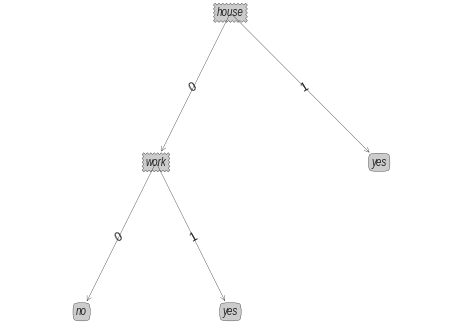

In [105]:
createPlot(myTree)

In [98]:
!fc-list

/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf: Liberation Sans Narrow:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf: Liberation Sans:style=Regular
/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf: Liberation Mono:style=Bold Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf: Liberation Serif:style=Italic
/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf: Liberation Mono:style=Bold
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf: Liberation Sans Narrow:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf: Liberation Serif:style=Bold
/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf: Liberation Mono:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf: Liberation Sans:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf: Liberation Serif:style=Bold Italic
/usr/share/fonts/truet